# Correlaciones

En los dos primeros módulos hemos visto cómo
analizar una variable categórica (serie favorita vs no favorita, jugador top 
vs jugador no top y un cliente de da de baja o se queda) tanto estadísticamente
como con visualizaciones. Ahora bien, ``¿qué herramientas tenemos cuando
queremos estudiar una variable continua?`` 

En este módulo vamos a trabajar en el siguiente proyecto:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    Walmart, uno de los retailers más grandes del mundo, nos ha pedido analizar
    sus ventas. El objetivo es descubrir qué variables pueden influir o
    explicar la demanda de sus tiendas.
</div>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

np.random.seed(777)

# 0. Lectura de Datos

Contamos con un set de datos de las ventas de 45 tiendas de Walmart 2010, 2011
y 2012.

In [4]:
# para usar Colab

# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# TODO: leer fichero en el path walmart_sales.parquet

In [6]:
# TODO: analizar el dataset

df = pd.read_parquet('walmart_sales.parquet')

In [7]:
df.head()

,id_tienda,fecha,week,anyo,mes,ventas,festivo,temperatura,precio_combustible,indice_precios,tasa_desempleo,ventas_lag1,ventas_lag2,ventas_lag3,ventas_lag4,ventas_lag5,ventas_lag6,ventas_lag7,ventas_lag8,ventas_lag52
0,1,2010-01-08,01,2010,1,1444732.28,0.0,48.27,2.976,211.404742,7.742,1367320.01,2387950.20,1891034.93,1682614.26,1548033.78,1955624.11,1483784.18,1494479.49,1444732.28
1,1,2010-01-15,02,2010,1,1391013.96,0.0,35.40,2.983,211.457411,7.742,1444732.28,1367320.01,2387950.20,1891034.93,1682614.26,1548033.78,1955624.11,1483784.18,1391013.96
2,1,2010-01-22,03,2010,1,1327405.42,0.0,44.04,3.016,211.827234,7.742,1391013.96,1444732.28,1367320.01,2387950.20,1891034.93,1682614.26,1548033.78,1955624.11,1327405.42
3,1,2010-01-29,04,2010,1,1316899.31,0.0,43.83,3.010,212.197058,7.742,1327405.42,1391013.96,1444732.28,1367320.01,2387950.20,1891034.93,1682614.26,1548033.78,1316899.31
4,1,2010-02-05,05,2010,2,1643690.90,0.0,42.31,2.572,211.096358,8.106,1316899.31,1327405.42,1391013.96,1444732.28,1367320.01,2387950.20,1891034.93,1682614.26,1643690.90


| variable           | descripcion |
|--------------------|-------------|
| id_tienda          | ID de cada tienda. |
| fecha              | Fecha de la semana. |
| anyo               | Año. |
| mes                | Mes. |
| ventas             | Ventas en $. |
| festivo            | 1 si la semana tiene festivo 0 si no. |
| temperatura        | Temperatura en grados Fahrenheit. |
| precio_combustible | Precio de los combustibles. |
| indice_precios     | Índice general de precios al consumo. |
| tasa_desempleo     | Tasa de desempleo. |
| ventas_lag1        | Ventas hace 1 semana. |
| ventas_lag2        | Ventas hace 2 semana. |
| ventas_lag3        | Ventas hace 3 semana. |
| ventas_lag4        | Ventas hace 1 mes. |
| ventas_lag5        | Ventas hace 5 semana. |
| ventas_lag6        | Ventas hace 6 semana. |
| ventas_lag7        | Ventas hace 7 semana. |
| ventas_lag8        | Ventas hace 2 meses. |
| ventas_lag52       | Ventas hace 1 año. |

# 1. Visualizaciones

Cuando queremos estudiar una variable continua solemos buscar ``correlaciones``,
es decir otras variables que tengan relación con la variable continua de
interés. En el caso de Walmart, nuestra principal variable de interés es
``ventas`` y contamos con un total de 16 features adicionales a estudiar.

Las únicas feature que no son continuas son: ``festivo``, ``anyo`` y ``mes``.
En estos casos, para entender si estas variables afectan a las ventas y cómo,
podemos recurrir a visualizaciones que ya hemos empleado en anteriores módulos,
pero esta vez vamos a explorar todas las posibilidades que nos permite
personalizar matplotlib en combinación con seaborn:

## 1.1. Variables categóricas

### mes

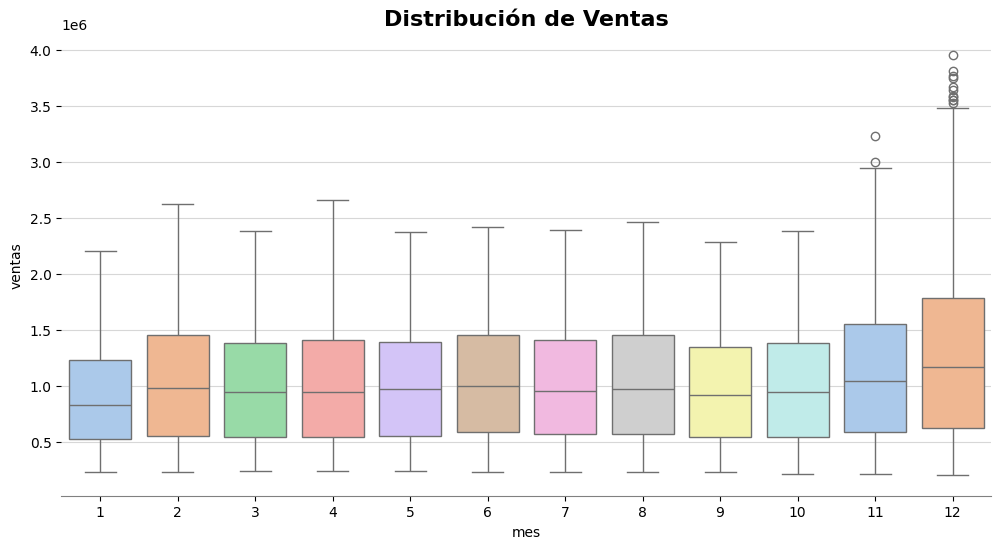

In [8]:
# TODO: configurar tamaño del plot (figsize=(12,6))
plt.figure(
    figsize = (12,6)
)


# TODO: boxplot ventas vs mes
ax = sns.boxplot(
    data = df,
    x = 'mes',
    y = 'ventas',
    hue = 'mes',
    palette = 'pastel',
    legend = False
)

# TODO: añadir título al plot y a los ejes
ax.set_title('Distribución de Ventas', fontsize = 16, fontweight = 'bold')

# TODO: personalizar el grid de fondo
ax.grid(
    alpha = 0.5, 
    drawstyle = 'steps',
    axis = 'y',
    linestyle = '-' 
    )


# TODO: personalizar el marco del plot (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')

# TODO: show plot

Una alternativa a los boxplots que es muy popular son los violinplots, los
cuales nos ayudan a visualizar un poco mejor cómo se distribuyen los datos
realmente entre los quartiles Q1 y Q3.

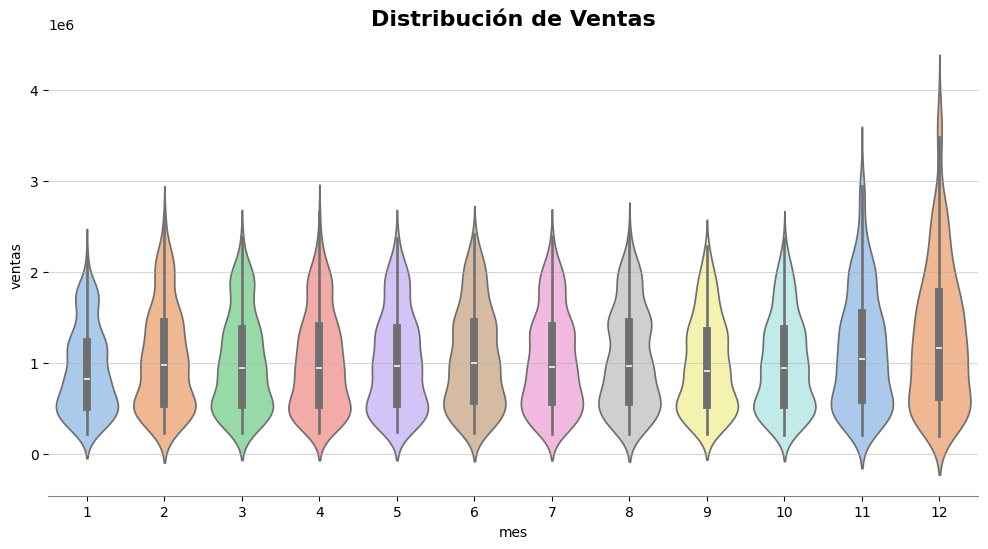

In [9]:
# TODO: configurar tamaño del plot (figsize=(12,6))
plt.figure(
    figsize = (12,6)
)


# TODO: boxplot ventas vs mes
ax = sns.violinplot(
    data = df,
    x = 'mes',
    y = 'ventas',
    hue = 'mes',
    palette = 'pastel',
    legend = False,
    # inner = 'quarts'
)

# TODO: añadir título al plot y a los ejes
ax.set_title('Distribución de Ventas', fontsize = 16, fontweight = 'bold')

# TODO: personalizar el grid de fondo
ax.grid(
    alpha = 0.5, 
    drawstyle = 'steps',
    axis = 'y',
    linestyle = '-' 
    )


# TODO: personalizar el marco del plot (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')

# TODO: show plot

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

<Axes: xlabel='Density', ylabel='ventas'>

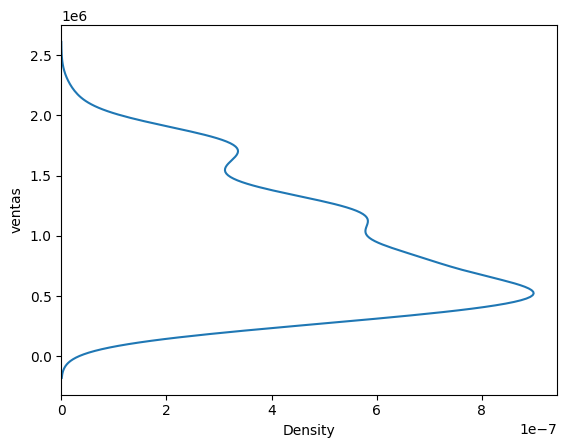

In [10]:
sns.kdeplot(
    data = df.query('mes==1'),
    y = 'ventas',
    # bins = 50
)

### anyo

Solo contamos con 3 años de histórico, por lo que analizar distribuciones por
año no tiene mucho sentido. En estos casos, el mejor recursos para analizar
datos tan a alto nivel es un simple gráfico de barras.

In [11]:
# TODO: sumar ventas anuales

df_ventas_anuales = df.groupby('anyo', as_index= False)['ventas'].sum()

In [12]:
for index, row in df_ventas_anuales.iterrows():
    print(index, row)

0 anyo      2.010000e+03
ventas    2.452590e+09
Name: 0, dtype: float64
1 anyo      2.011000e+03
ventas    2.448200e+09
Name: 1, dtype: float64
2 anyo      2.012000e+03
ventas    2.503588e+09
Name: 2, dtype: float64


/var/folders/4k/9hthz5210ms6_s09wx9tymvw0000gn/T/ipykernel_25973/1231180012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


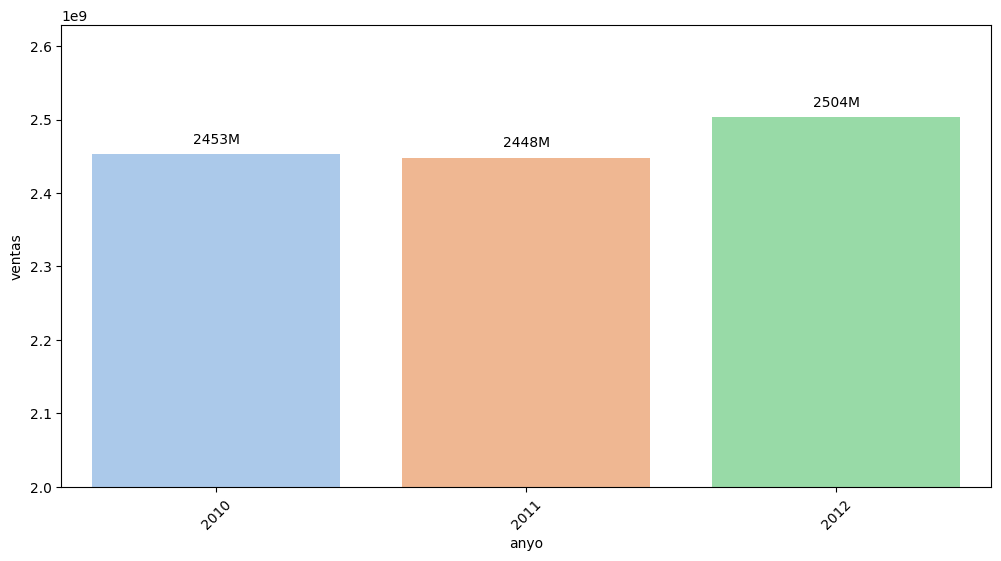

In [13]:
# TODO: configurar tamaño del plot

plt.figure(figsize = (12,6))

# TODO: barplot ventas vs año
ax = sns.barplot(
    data = df_ventas_anuales,
    x = 'anyo',
    y = 'ventas',
    palette= 'pastel'
)

# TODO: añadir título al plot y a los ejes
# TODO: añadir texto al plot (s=f"{row['ventas'] / 10**6:.0f}M")
for index, row in df_ventas_anuales.iterrows():
    ax.text(
        x = index,
        y = row['ventas'] + 10000000,
        ha = 'center',
        va = 'bottom',
        s = f"{row['ventas']  / 10**6:.0f}M"
    )


# TODO: rotar los ticks del eje x para una mejor legibilidad
ax.set_ylim(
    bottom = 2e+9
)

plt.xticks(rotation = 45)

# TODO: show plot

plt.show()

### festivos

Vamos a analizar los festivos que efecto tienen sobre las ventas. De nuevo
queremos entender qué relación tiene una variable categórica con una continua.

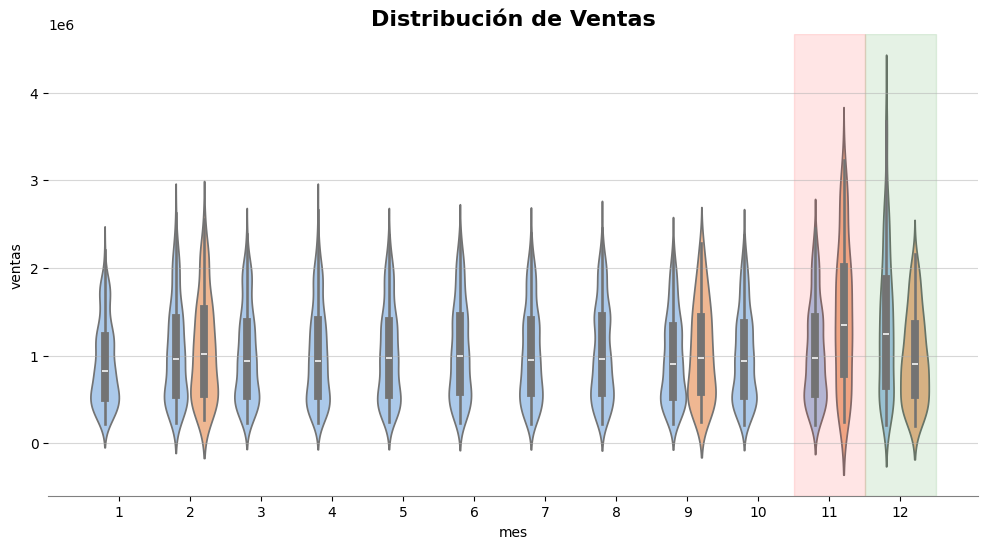

In [14]:
# TODO: configurar tamaño del plot (figsize=(12,6))
plt.figure(
    figsize = (12,6)
)


# TODO: boxplot ventas vs mes
ax = sns.violinplot(
    data = df,
    x = 'mes',
    y = 'ventas',
    hue = 'festivo',
    palette = 'pastel',
    legend = False,
    # inner = 'quarts'
)

# TODO: añadir título al plot y a los ejes
ax.set_title('Distribución de Ventas', fontsize = 16, fontweight = 'bold')

# TODO: personalizar el grid de fondo
ax.grid(
    alpha = 0.5, 
    drawstyle = 'steps',
    axis = 'y',
    linestyle = '-' 
    )


# TODO: personalizar el marco del plot (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')

ax.axvspan(xmin = 10 - 0.5, xmax = 11 - 0.5, color = 'r', alpha = 0.1)
ax.axvspan(xmin = 11 - 0.5, xmax = 12 - 0.5, color = 'g', alpha = 0.1)


# TODO: show plot

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

In [15]:
# TODO: configurar tamaño del plot
# TODO: violinplot ventas vs festivos
# TODO: añadir rectangulo vertical para enfatizar (factor_corrector= -1)
# TODO: añadir título al plot y a los ejes
# TODO: personalizar el grid de fondo
# TODO: personalizar el marco del plot
# TODO: show plot

## 1.2. Variables continuas

El resto de variables que tenemos en el dataset son continuas: ``temperatura``, 
``precio_combustible``, ``indice_precios``, ``tasa_desempleo``, ``ventas_lag1``, 
``ventas_lag2``, ``ventas_lag3``, ``ventas_lag4``, ``ventas_lag5``, 
``ventas_lag6``, ``ventas_lag7``, ``ventas_lag8`` y ``ventas_lag52``. Para
entender si dos variables tienen relación entre sí tenemos dos herramientas:
- visualizaciones
- coeficientes de correlación

En esta sección vamos a empezar con las visualizaciones, con las que ya tenemos
experiencia y en la siguiente veremos los coeficientes de correlación.

### Visualizaciones

Cuando queremos analizar la relación que tienen dos variables continuas, el
gráfico por excelencia es el ``scatterplot`` (gráfico de dispersión).
En cada eje situamos cada una de las variables y representamos con puntos los
registros de nuestro dataset. Vamos a ver la relación que hay entre las ventas
de cada semana con las que tuvo la semana anterior:

#### scatterplots - basic

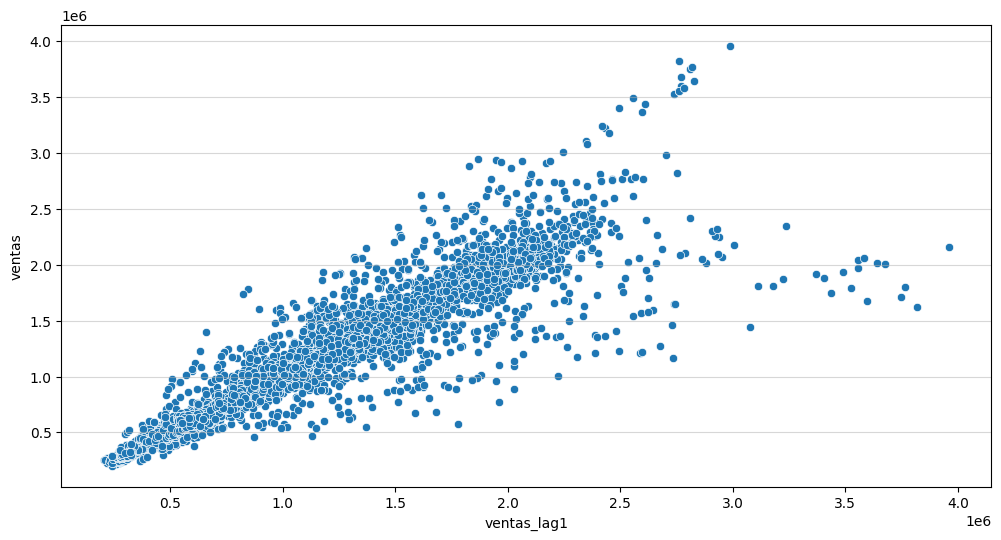

In [16]:
# TODO: configurar tamaño del plot (figsize=(12,6))
plt.figure(
    figsize = (12,6)
)


# TODO: boxplot ventas vs mes
ax = sns.scatterplot(
    data = df,
    x = 'ventas_lag1',
    y = 'ventas'
    # hue = 'festivo',
    # palette = 'pastel',
    # legend = False,
    # inner = 'quarts'
)

# TODO: añadir título al plot y a los ejes
# ax.set_title('Distribución de Ventas', fontsize = 16, fontweight = 'bold')

# TODO: personalizar el grid de fondo
ax.grid(
    alpha = 0.5, 
    drawstyle = 'steps',
    axis = 'y',
    linestyle = '-' 
    )


# TODO: personalizar el marco del plot (spines)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_color('gray')

# TODO: show plot

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    DISCUTIR correlación vs causalidad
</div>

#### scatterplot - alpha

Cuando tenemos muchos datos, hay veces que combiene trabajar un poco más la
visualización de un scatterplot. Para entender mejor cómo se distribuye la
densidad de puntos podemos sencillamente hacer los puntos semitransparentes:

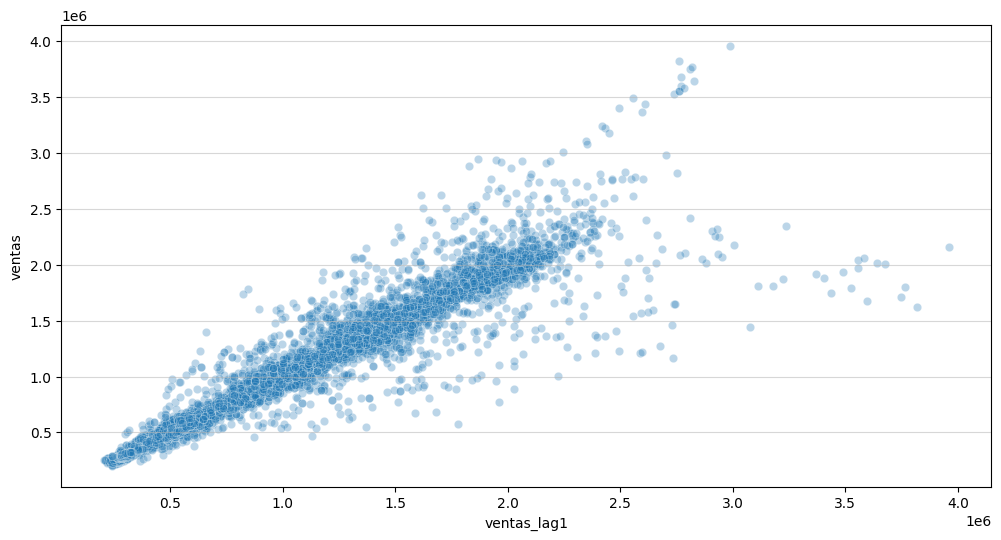

In [17]:
# TODO: configurar tamaño del plot (figsize=(12,6))
plt.figure(
    figsize = (12,6)
)


# TODO: boxplot ventas vs mes
ax = sns.scatterplot(
    data = df,
    x = 'ventas_lag1',
    y = 'ventas',
    alpha = 0.3
    # hue = 'festivo',
    # palette = 'pastel',
    # legend = False,
    # inner = 'quarts'
)

# TODO: añadir título al plot y a los ejes
# ax.set_title('Distribución de Ventas', fontsize = 16, fontweight = 'bold')

# TODO: personalizar el grid de fondo
ax.grid(
    alpha = 0.5, 
    drawstyle = 'steps',
    axis = 'y',
    linestyle = '-' 
    )


# TODO: personalizar el marco del plot (spines)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_color('gray')

# TODO: show plot

Este efecto nos puede ayudar a ignorar zonas poco representadas, que solo
aportan ruido, y dar más peso a aquellas zonas con mayor densidad de puntos
para entender mejor el patrón general que hay en los datos. Vamos a pintar
todos los lags para comparar mejor con qué se corresponden más las ventas de
cada semana:

In [18]:
for i, ax in enumerate(axes.flatten()):
    print(i, ax)

NameError: name 'axes' is not defined

<Figure size 1200x600 with 0 Axes>

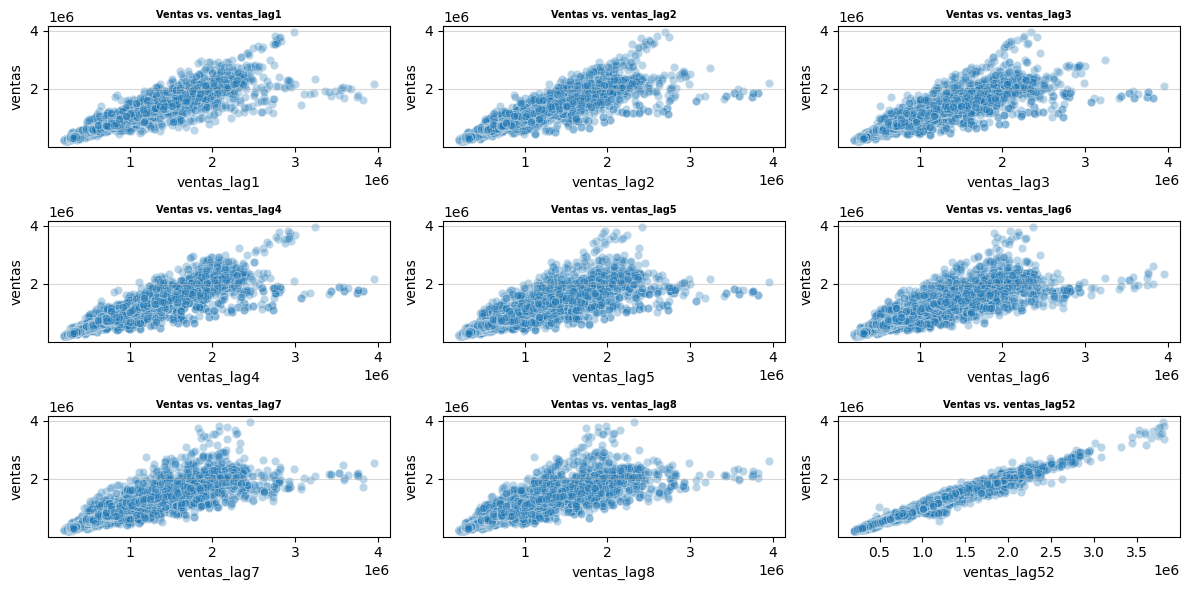

In [ ]:
# TODO: iniciar el grid para el plot (3, 3, figsize=(12, 6))
# TODO: aplanar todos los axes para poder recorrerlos todos en un solo bucle
# TODO: pintar cada scatterplot de forma 
lag_cols = ['ventas_lag1', 'ventas_lag2', 'ventas_lag3', 'ventas_lag4',
    'ventas_lag5', 'ventas_lag6', 'ventas_lag7', 'ventas_lag8', 'ventas_lag52']
# TODO: ajustar espacio entre plots

# TODO: configurar tamaño del plot (figsize=(12,6))
plt.figure(
    figsize = (12,6)
)

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 6))

# TODO: boxplot ventas vs mes
for i, ax in enumerate(axes.flatten()):

    sns.scatterplot(
        data = df,
        x = lag_cols[i],
        y = 'ventas',
        alpha = 0.3,
        ax = ax
)
    ax.grid(
        alpha = 0.5, 
        drawstyle = 'steps',
        axis = 'y',
        linestyle = '-' 
        )   
    ax.set_title(f'Ventas vs. {lag_cols[i]}', fontsize = 7, fontweight = 'bold')

# TODO: añadir título al plot y a los ejes
# ax.set_title('Distribución de Ventas', fontsize = 16, fontweight = 'bold')

# TODO: personalizar el grid de fondo
# ax.grid(
#     alpha = 0.5, 
#     drawstyle = 'steps',
#     axis = 'y',
#     linestyle = '-' 
#     )


# TODO: personalizar el marco del plot (spines)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_color('gray')

# TODO: show plot
plt.tight_layout()
plt.show()

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

#### 2D density plot

Una variante de los gráficos de dispersión que resulta visualmente más
atractiva son los gráficos de ``densidad en 2D``. Enfrentamos las dos variables
continuas en un mismo plot, pero esta vez no vamos a representar los datos
como puntos, sino que con una escala de colores vamos a marcar la zonas con
mayor presencia de puntos con un tono fuerte y las que menos con un tono suave:

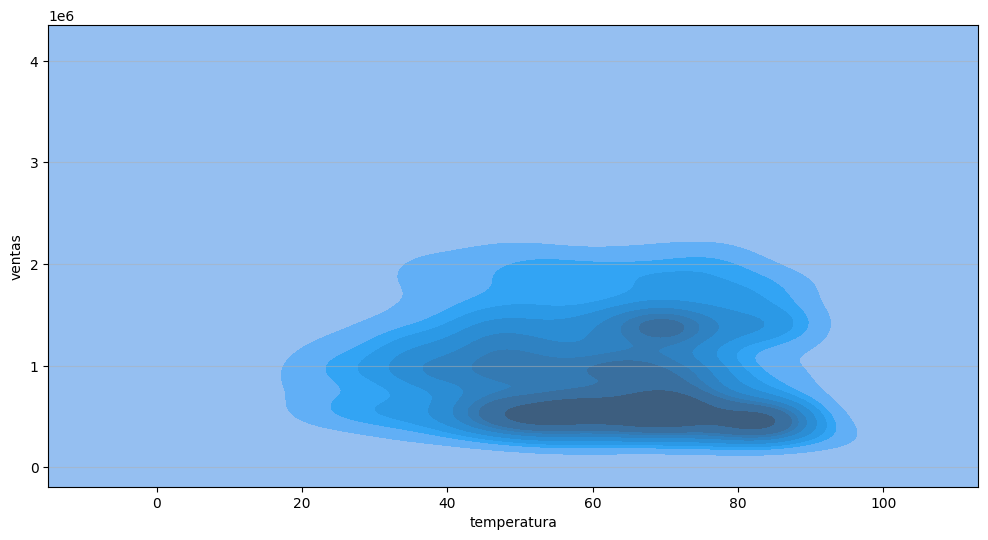

In [ ]:
# TODO: configurar tamaño del plot (figsize=(12,6))
plt.figure(
    figsize = (12,6)
)


# TODO: boxplot ventas vs mes
ax = sns.kdeplot(
    data = df,
    x = 'temperatura',
    y = 'ventas',
    fill = True,
    thresh = 0
    # alpha = 0.3
    # hue = 'festivo',
    # palette = 'pastel',
    # legend = False,
    # inner = 'quarts'
)

# TODO: añadir título al plot y a los ejes
# ax.set_title('Distribución de Ventas', fontsize = 16, fontweight = 'bold')

# TODO: personalizar el grid de fondo
ax.grid(
    alpha = 0.5, 
    drawstyle = 'steps',
    axis = 'y',
    linestyle = '-' 
    )


# TODO: personalizar el marco del plot (spines)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_color('gray')

# TODO: show plot

Vamos a pintar un 2D density plot para las cuatro variables restantes que nos
quedan en el dataset y a analizarlas juntas: ``temperatura``,
``precio_combustible``, ``indice_precios``, ``tasa_desempleo``.

In [20]:
# TODO: iniciar grid para el plot (2, 2, figsize=(12, 6))

# TODO: aplanar todos los axes para poder recorrerlos todos en un solo bucle

# TODO: pintar cada scatterplot ventas vs ventas lag1
features = ['temperatura', 'precio_combustible', 'indice_precios', 
           'tasa_desempleo']

fig, axes = plt.subplots

for i, ax in enumerate(axes.flatten()):

    sns.kdeplot(
        data = df,
        x = features[i],
        y = 'ventas',
        thresh = 0,
        ax = ax
)
    ax.grid(
        alpha = 0.5, 
        drawstyle = 'steps',
        axis = 'y',
        linestyle = '-' 
        )   
    ax.set_title(f'Ventas vs. {lag_cols[i]}', fontsize = 7, fontweight = 'bold')

# TODO: añadir título al plot y a los ejes
# ax.set_title('Distribución de Ventas', fontsize = 16, fontweight = 'bold')

# TODO: personalizar el grid de fondo
# ax.grid(
#     alpha = 0.5, 
#     drawstyle = 'steps',
#     axis = 'y',
#     linestyle = '-' 
#     )


# TODO: personalizar el marco del plot (spines)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_color('gray')

# TODO: show plot
plt.tight_layout()
plt.show()

TypeError: cannot unpack non-iterable function object

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    HIPÓTESIS: Tenemos muchas tiendas y no sabemos dónde están localizadas. EEUU es muy
    grande, tanto como para que la temperatura y la capacidad adquisitiva de
    los clientes sea muy distinta entre las tiendas.
</div>

Vamos a empezar  validar esta hipótesis contra la feature de temperatura.

##### temperatura

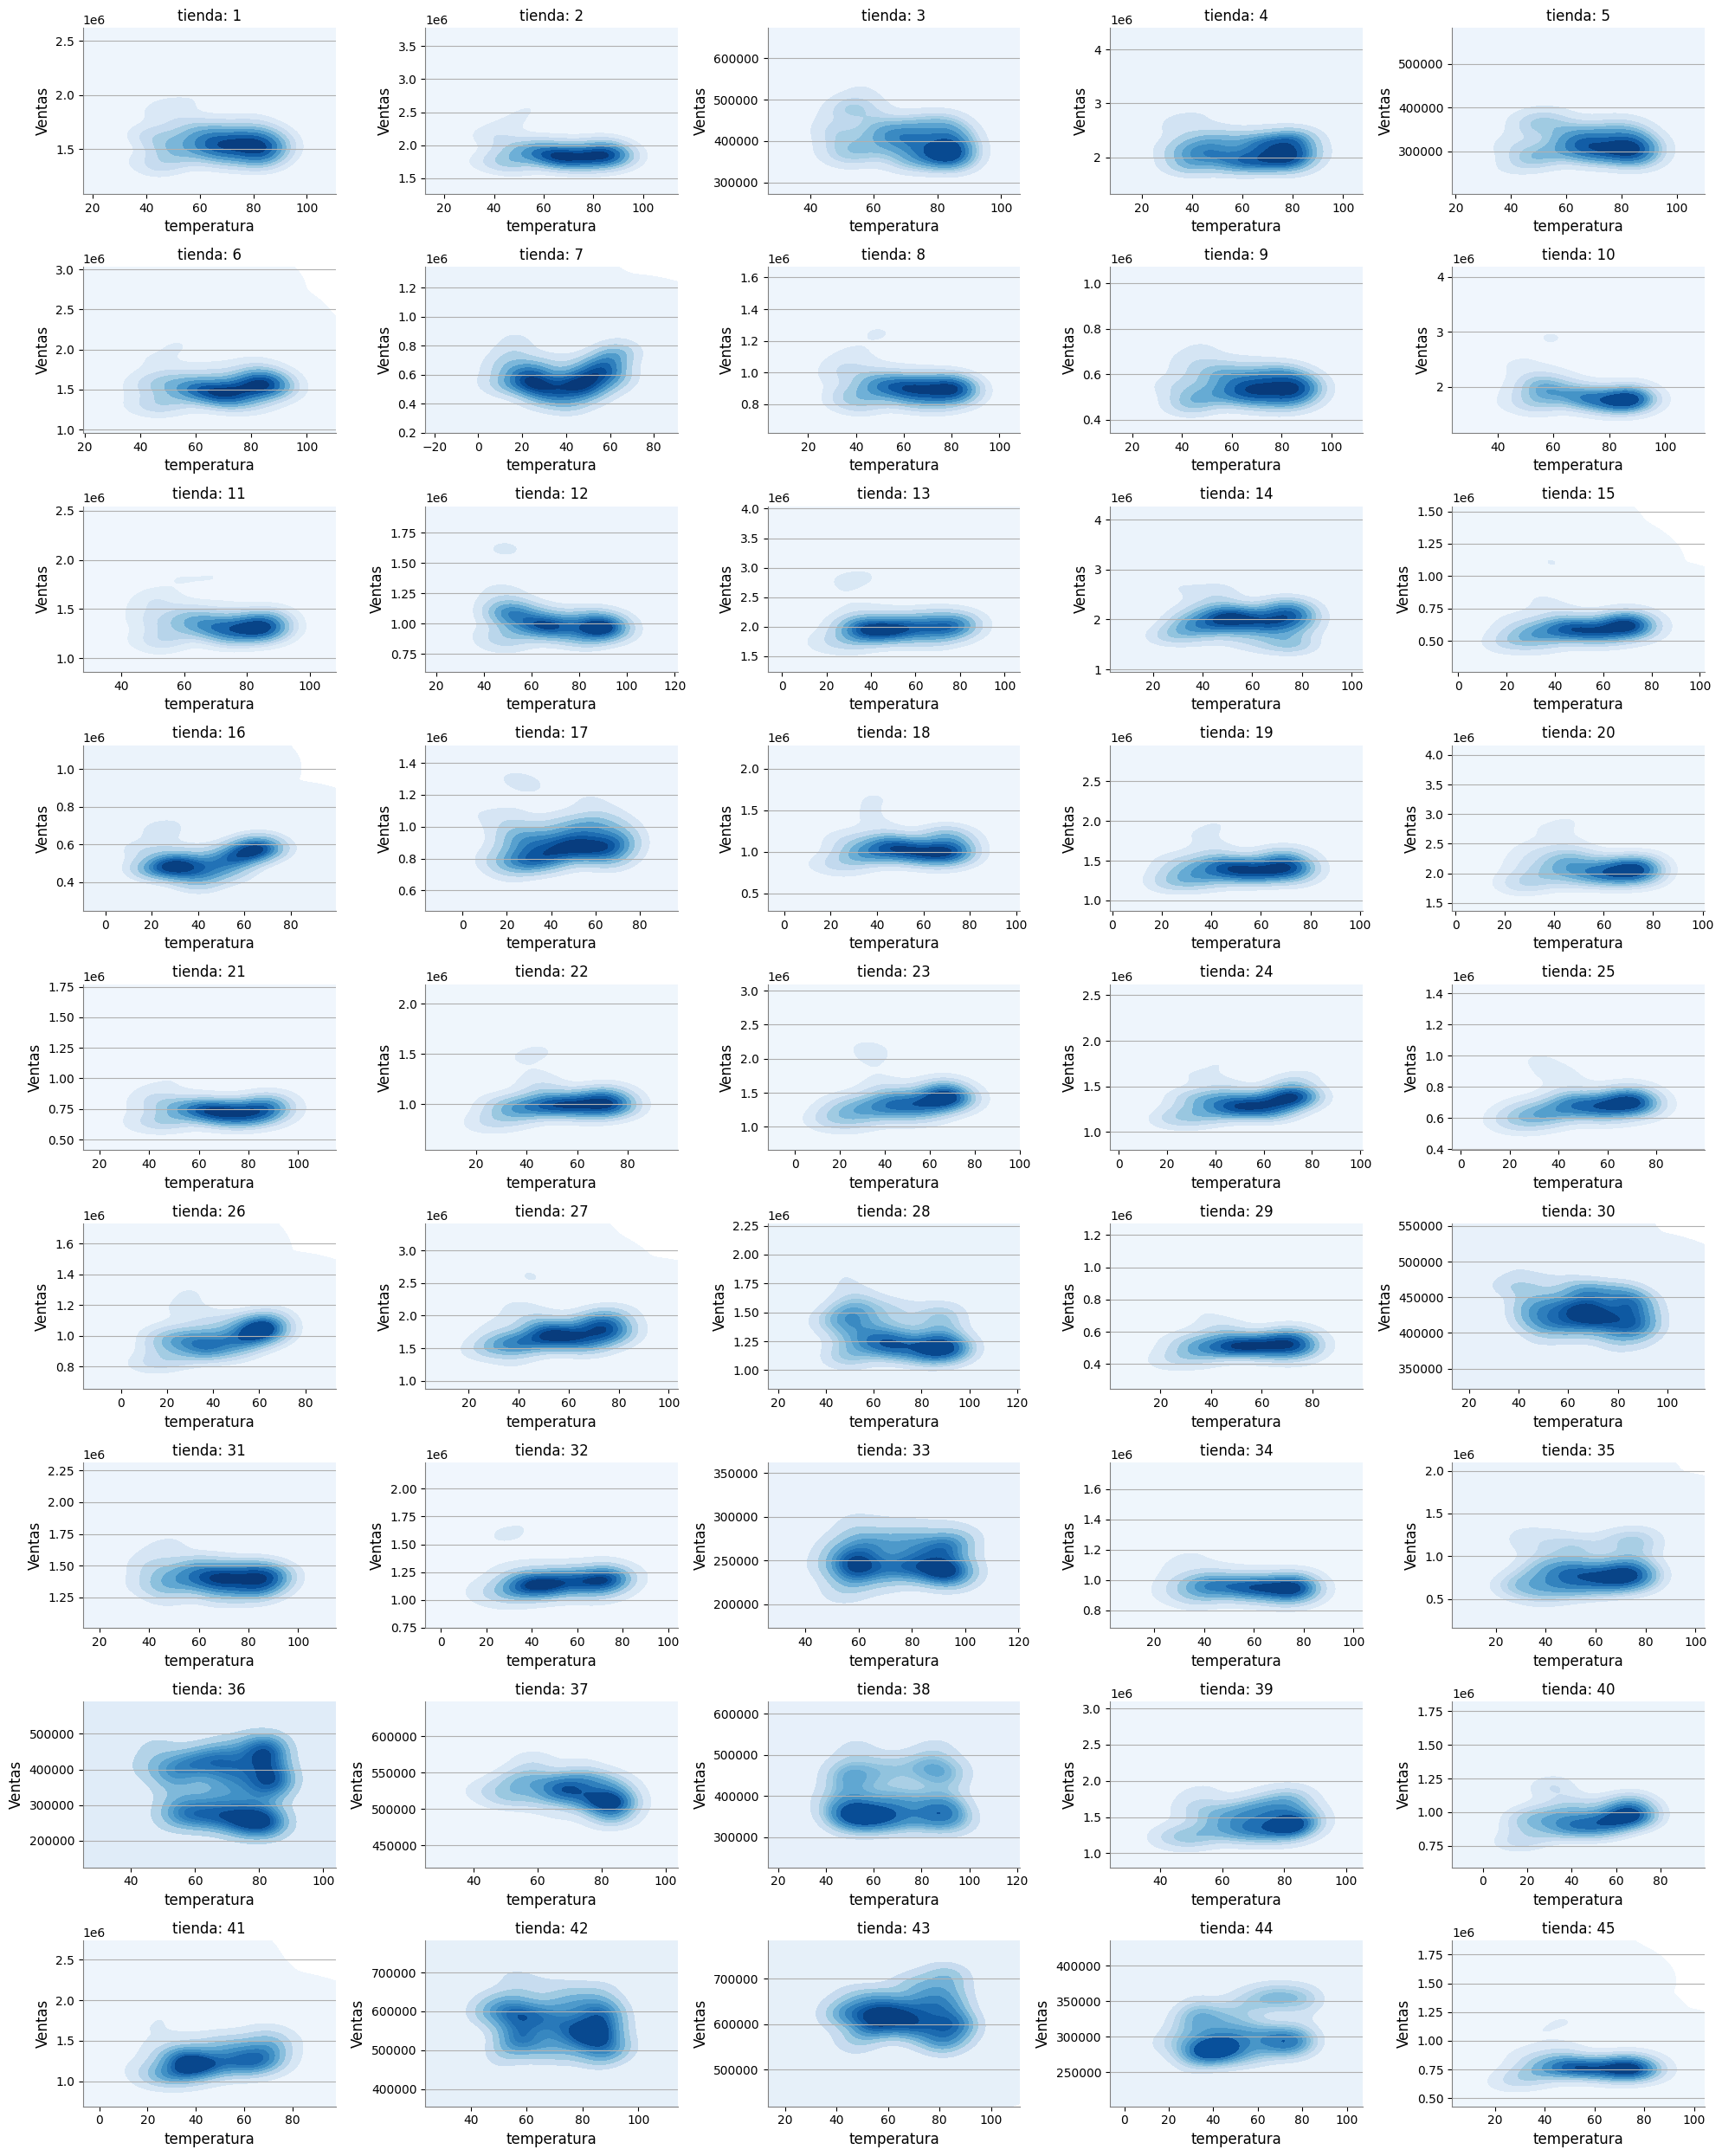

In [21]:
feature = "temperatura"

# TODO: extraemos los 45 ids de cada tienda
ids_tiendas = df.id_tienda.unique()

# TODO: iniciamos el plot (grid de 45 celdas)
fig, axes = plt.subplots(9, 5, figsize=(20, 25))

# TODO: aplanamos todos los axes para poder recorrerlos todos en un solo bucle
axes_flat = axes.flatten()
for id, ax in zip(ids_tiendas, axes_flat):

    sns.kdeplot(
        data=df.query(f"id_tienda == {id}").copy(),  # filtramos tienda
        x=feature, 
        y="ventas", 
        cmap="Blues", 
        fill=True, 
        thresh=0.0,
        ax=ax,  # pintamos sobre un ax ya existente
        )
    
    # TODO: añadir título a los ejes
    ax.set_title(f"tienda: {id}", fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Ventas", fontsize=12)

    # TODO: personalizar el grid de fondo
    ax.grid(alpha=1, drawstyle="steps", axis="y", linestyle="-")

    # TODO: personalizar el marco del plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("gray")
    ax.spines["bottom"].set_color("gray")

# TODO: ajustamos espacio entre plots
plt.tight_layout()

Claramente podemos ver la diversidad de efectos que hay entre cada tienda. En
la mayoria de las tiendas podemos cómo la subida de las temperaturas suele
estar asociada a ventas altas y al reves. Y en una minoría el precio se
mantiene plano.

Para evitar repetir código innecesariamente podemos crear una función para
repetir el último plot para las otras tres variables continuas que nos quedan
por analizar.

In [22]:
# TODO: crear función con el código que reproduzca la celda anterior

def kdeplot_ventas_vs_feature(feature):
    ids_tiendas = df.id_tienda.unique()

    fig, axes = plt.subplots(9, 5, figsize=(20, 25))

    axes_flat = axes.flatten()
    for id, ax in zip(ids_tiendas, axes_flat):
        sns.kdeplot(
            data=df.query(f"id_tienda == {id}").copy(),
            x=feature, 
            y="ventas", 
            cmap="Blues", 
            fill=True, 
            thresh=0.0,
            ax=ax,
            )

        ax.set_title(f"tienda: {id}", fontsize=12)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel("Ventas", fontsize=12)

        ax.grid(alpha=1, drawstyle="steps", axis="y", linestyle="-")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("gray")
        ax.spines["bottom"].set_color("gray")

    plt.tight_layout()

##### precio_combustible

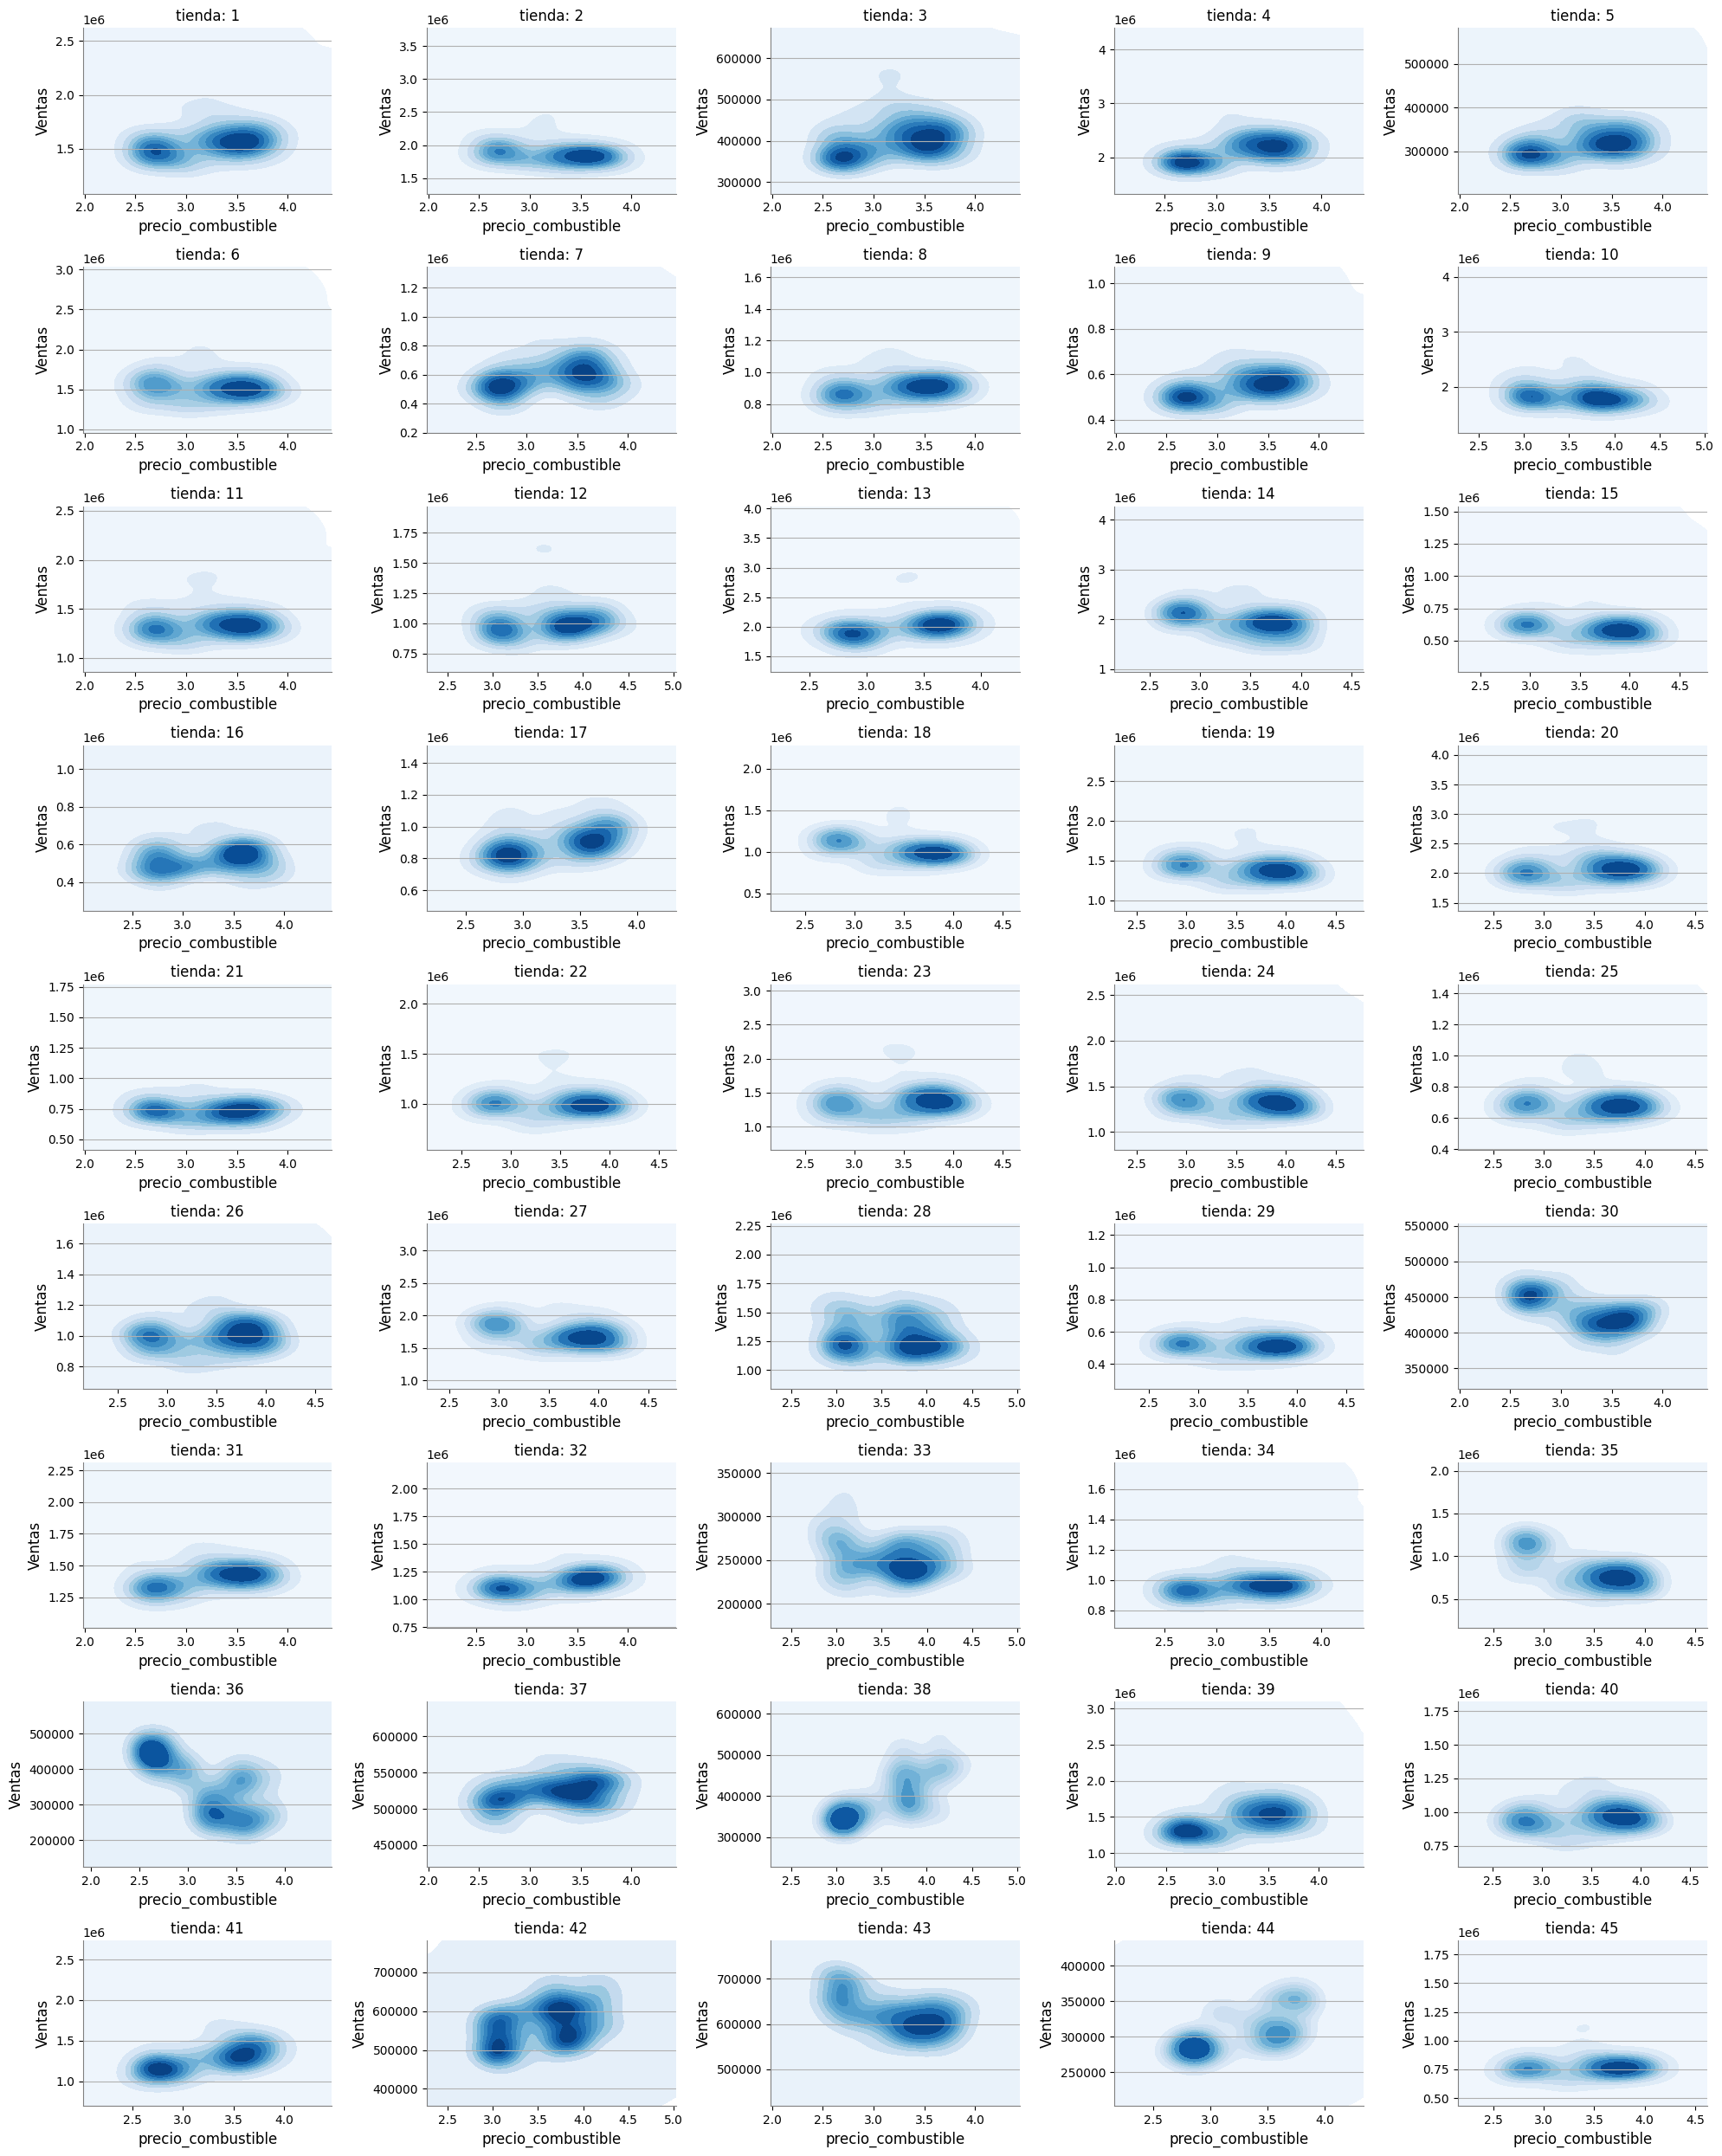

In [23]:
# # TODO: 2D density plot del precio del combustible vs ventas por cada tienda ("precio_combustible")
kdeplot_ventas_vs_feature(feature="precio_combustible")

##### indice_precios

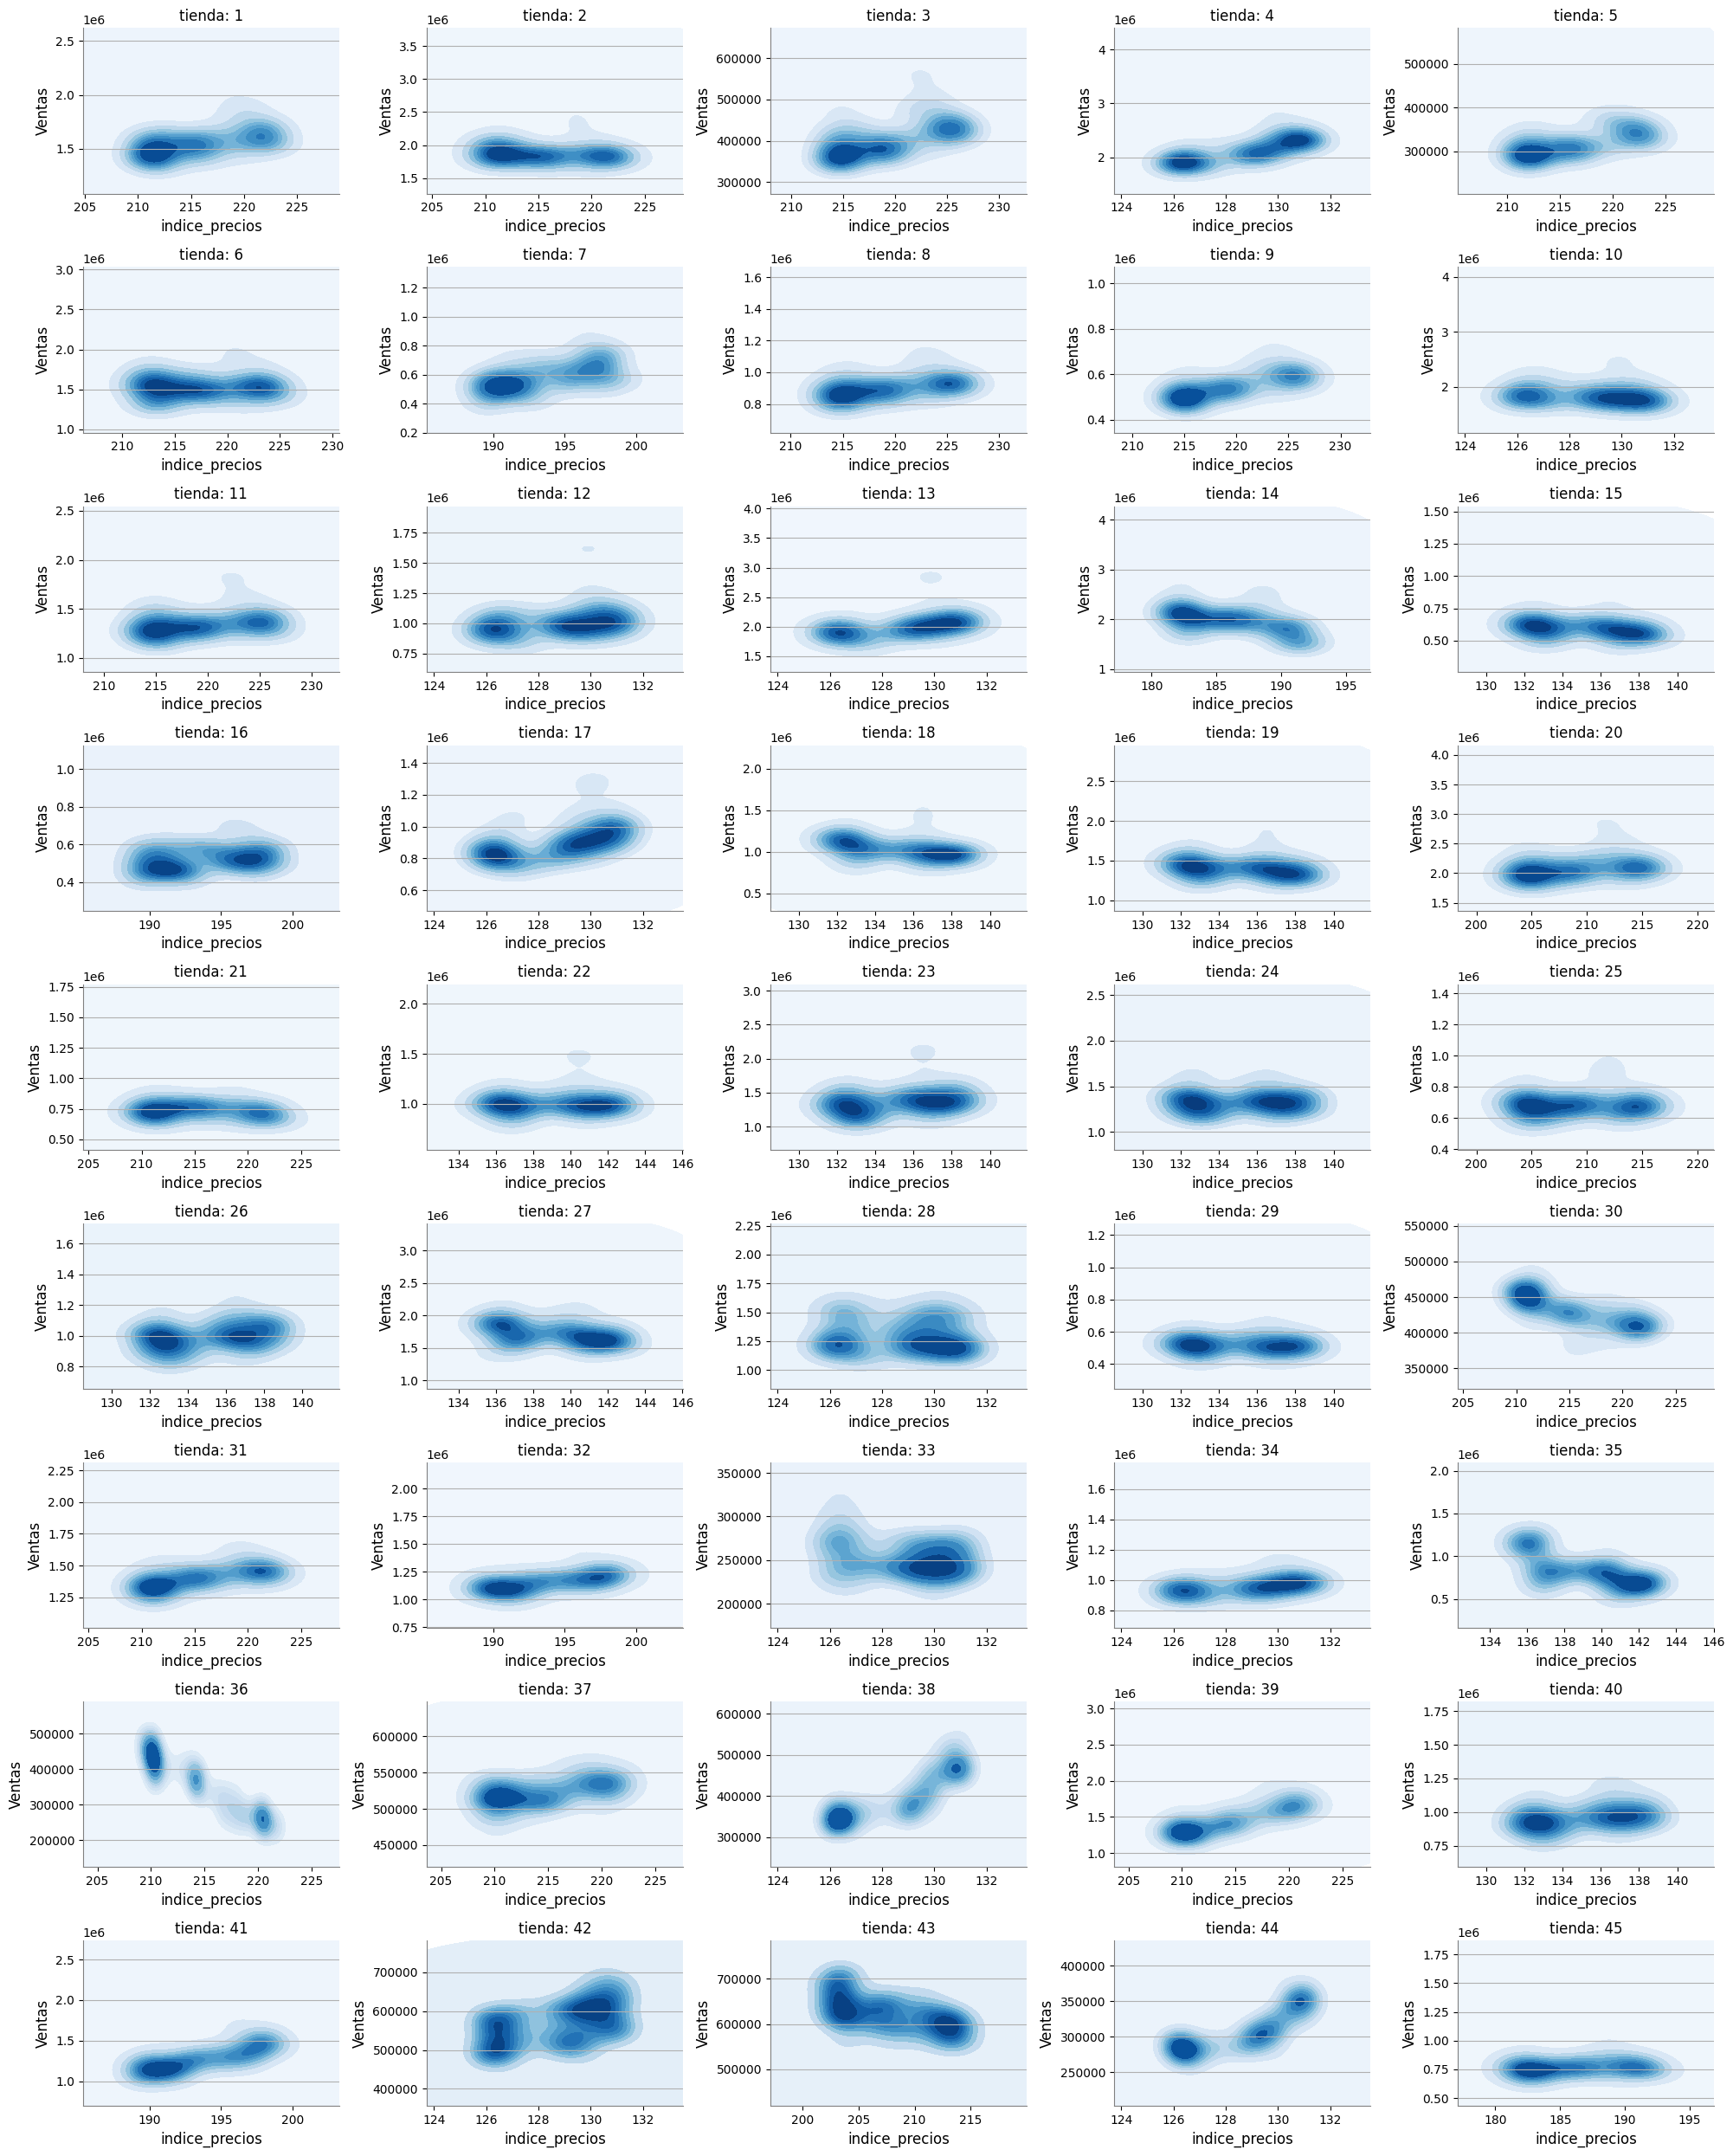

In [24]:
# # TODO: 2D density plot del índice de precios vs ventas por cada tienda ("indice_precios")
kdeplot_ventas_vs_feature(feature="indice_precios")

##### tasa_desempleo

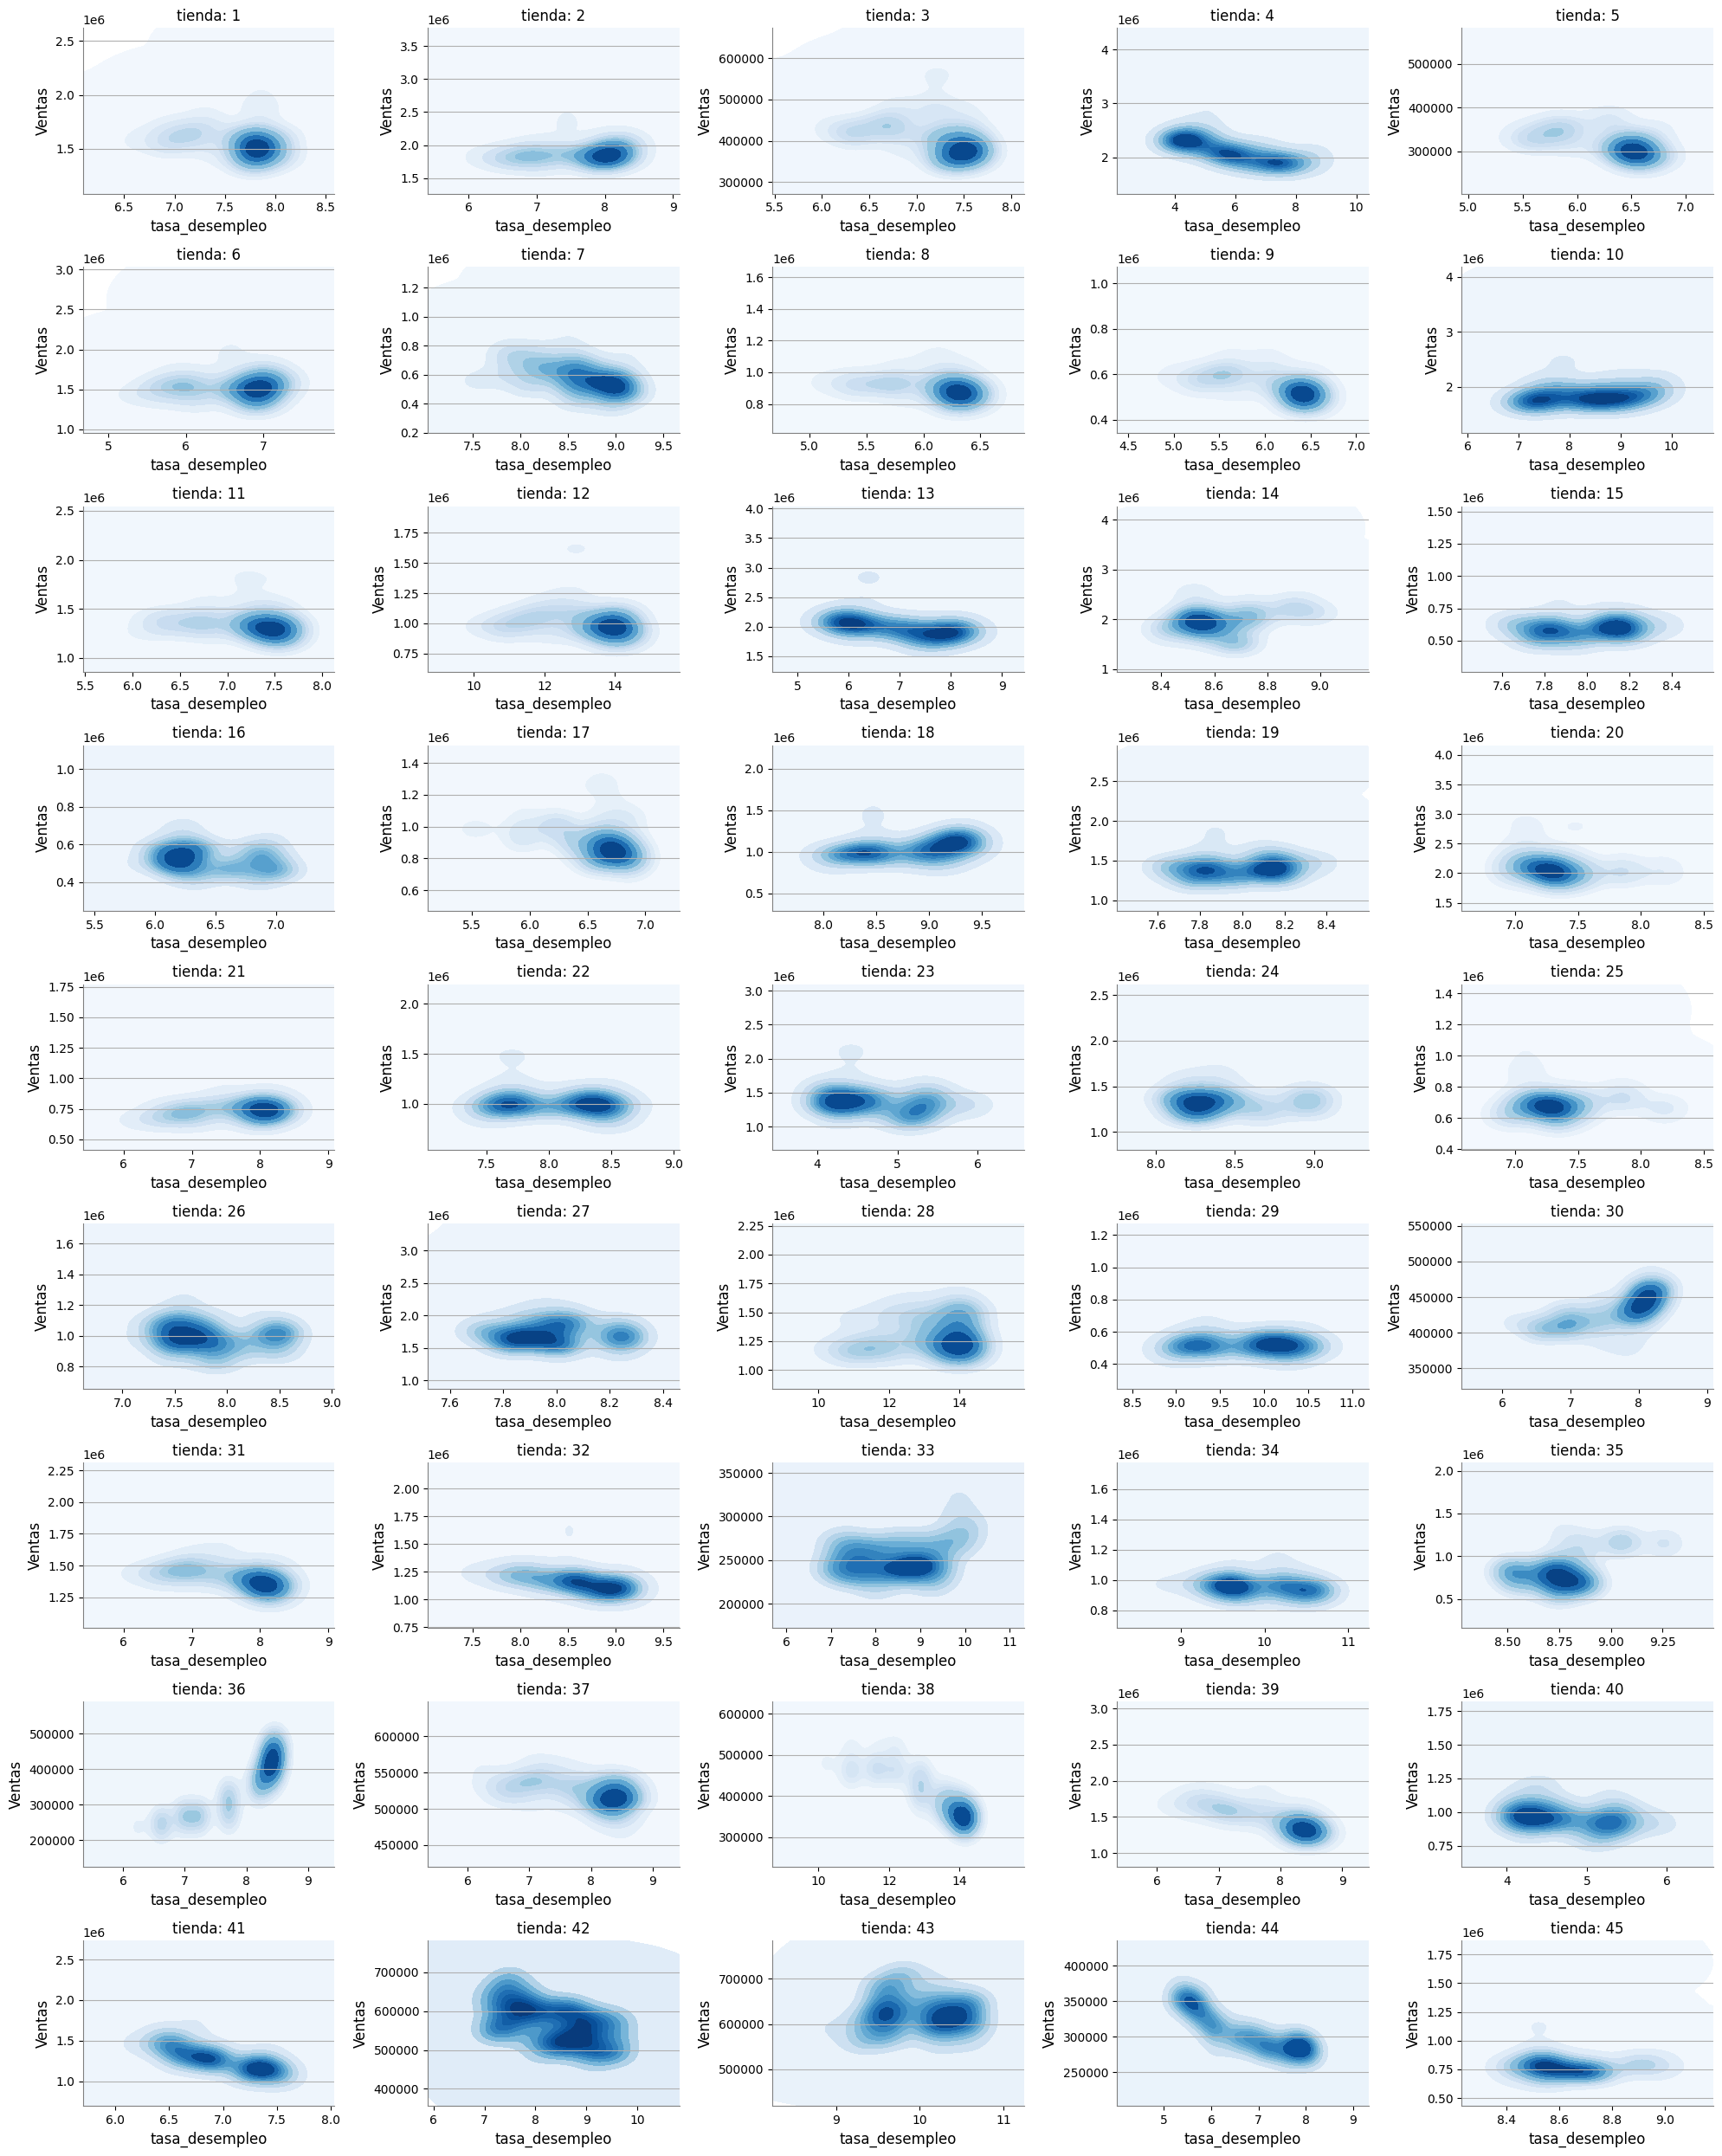

In [25]:
# TODO: 2D density plot de la tasa de empleo vs ventas por cada tienda ("tasa_desempleo")
kdeplot_ventas_vs_feature(feature="tasa_desempleo")

#### Summary

Cada tienda parece tener una circunstancia especial por la que la asociación de
las ventas con el resto de varibles continuas es necesario estudiarse por
separado. Cualquier análisis de la ``tasa_desempleo``, ``temperatura``,
``indice_precios`` o ``precio_combustible`` debe hacerse tienda a tienda para
no extrapolar conclusiones equivocadas. La pregunta pertinente que podemos
hacernos ahora mismo es la siguiente:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Cómo podemos "digerir" tanto gráfico?
</div>


# 2. Coeficientes de correlación

Es relativamente frecuente encontrarnos en una situación analizando datos donde
nos vemos desbordados por el número de gráficos, ya sea porque contamos con
muchas variables o porque necesitamos entrar muy en detalle en nuestro análisis
(como puede ser el análisis tienda por tienda en el que nos encontramos).

En ambas situaciones puede ser muy útil recurrir a los
``coeficientes de correlación``. Un coeficiente de correlación es una medida que
nos indica si dos variables X e Y tienen una relación correlación entre si.
Vamos a ver los dos coeficientes más famosos.

## 2.1. Correlación de Pearson

El coeficiente de correlación de Pearson es una medida estadística que mide la relación lineal entre dos variables continuas. Este coeficiente varía entre -1 y 1, donde:

- 1 indica una correlación positiva perfecta,
- 0 indica que no hay correlación,
- -1 indica una correlación negativa perfecta.

Formalmente, el coeficiente de correlación de Pearson se define con la
siguiente fórmula:

$$

r_{xy} = \frac{{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}}{{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}}

$$

Donde:
- $ r_{xy} $ es el coeficiente de correlación de Pearson entre las variables $ x $ e $ y $,
- $ n $ es el número de observaciones,
- $ x_i $ y $ y_i $ son las observaciones de las variables $ x $ e $ y $ respectivamente,
- $ \bar{x} $ y $ \bar{y} $ son las medias de las variables $ x $ e $ y $ respectivamente.

Pero la matemática que hay detrás no debe asustarnos, lo más importante que hay
que tener en cuenta para usar correctamente este coeficiente en la práctica es
lo siguiente:
- cuanto mas cerca esté de 1 o -1, más evidencia tenemos de que las dos
variables $ x $ e $ y $ están relacionadas,
- el tipo de relación que se mide es LINEAL. Ambas variables puede estar
relacionadas, pero si no es de forma lineal, la correlación de Pearson no es
la herramienta correcta para detectarla (a continuación veremos con ejemplos
qué queremos decir con relación "lineal").
- este coeficiente es sensible a outliers.

In [ ]:
# # TODO: cálculo manual de la correlación de pearson entre ventas y temperatura:

# # TODO: calcular medias
# media_ventas = df.ventas.mean()
# media_temperatura = df.temperatura.mean()

# # TODO: calcular numerador
# ps_num = (df.ventas - media_ventas) * (df.temperatura - media_temperatura)
# num = ps_num.sum()

# # TODO: calcular denominador
# ps_den1 = (df.ventas - media_ventas)**2
# ps_den2 = (df.temperatura - media_temperatura)**2
# den = np.sqrt(ps_den1.sum()) * np.sqrt(ps_den2.sum())

# # TODO: calcular coeficiente final
# corr_pearson = num / den
# print(f"Correlación Pearson (ventas, temperatura) = {corr_pearson}")

Como vemos, la correlación de person entre ambas variables es muy pequeña, está
muy próxima a 0, por lo que de primeras no vemos evidencias de una relación
lineal entre las variables. Justo la conclusión a la que llegamos cuando
analizamos el primer gráfico 2D density plot de ventas vs temperatura. 

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿qué correlación tendrán las ventas y la temperatura por cada tienda?
</div>

Por suerte para nosotros, estos cálculos no tenemos que picarlos a mano para
cada tienda. ``pandas`` nos proporciona un método para calcular correlaciones:

In [ ]:
# TODO: calcular correlación entre ventas y temperatura usando pandas

Para todas las variables numérica que seleccionemos, el método ``corr()``
calculará la correlación de pearson entre todos los pares de variables,
incluida cada variable consigo misma (cuya correlación es 1.0).

Con un ``groupby()`` primero, podemos pedirle a ``pandas`` que realice este
cálculo tienda por tienda:

In [ ]:
# # TODO: calcular correlación de ventas y temperatura tienda por tienda
# df_corr = (
#     df
#     .groupby("id_tienda", as_index=False)  # type: ignore
#     [["ventas", "temperatura"]]
#     .corr()
#     .drop(columns='ventas')
#     .loc[:,'ventas',:]
#     .rename_axis(index='id_tienda')
#     .rename(columns={'temperatura':'corr_ventas_vs_temperatura'})
#     .sort_values(by='corr_ventas_vs_temperatura', ascending=True)
# )

Vaya, resulta que si miramos cada uno de los coeficientes de correlación por
separado sí encontramos tiendas para las que la correlación de pearson si es
significativamente distinta de 0.0. Vamos a visualizar el 2D density plot de
las 3 con mayor y las 3 con menor correlación de pearson.

In [ ]:
# # TODO: definir las 6 tiendas que más correlan entre ventas y temperatura
# ids_tiendas = [9, 11, 27] + [43, 25, 42]
# feature = "temperatura"

# # TODO: iniciar el plot (grid de 6 celdas)
# fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# # TODO: aplanamos todos los axes para poder recorrerlos todos en un solo bucle
# axes_flat = axes.flatten()
# for id, ax in zip(ids_tiendas, axes_flat):
#     # scaterplot ventas vs temperatura
#     sns.kdeplot(
#         data=df.query(f"id_tienda == {id}").copy(),  # filtramos tienda
#         x=feature, 
#         y="ventas", 
#         cmap="Blues", 
#         fill=True, 
#         thresh=0.0,
#         ax=ax,  # pintamos sobre un ax ya existente
#         )
    
#     # TODO: añadir título a los ejes
#     ax.set_title(f"tienda: {id}", fontsize=12)
#     ax.set_xlabel(feature, fontsize=12)
#     ax.set_ylabel("Ventas", fontsize=12)

#     # TODO: personalizar el grid de fondo
#     ax.grid(alpha=1, drawstyle="steps", axis="y", linestyle="-")

#     # TODO: personalizar el marco del plot
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     ax.spines["left"].set_color("gray")
#     ax.spines["bottom"].set_color("gray")

# # TODO: ajustamos espacio entre plots
# plt.tight_layout()

Las tiendas 9, 11 y 27 nos mostraban una correlación negativa entre las ventas
y la temperatura, pero no parece evidente esta relación en los gráficos. Por el
contratio, los gráficos 43, 25 y 42 mostraban una correlación positiva, pero
tampoco parace evidente. ¿qué puede estar ocurriendo para que la correlación
de pearson no parezca corresponderse con la realidad? Vamos a visualizar el 
scatterplot de estos mismos gráficos:

In [ ]:
# # TODO: definir las 6 tiendas que más correlan entre ventas y temperatura
# ids_tiendas = [9, 11, 27] + [43, 25, 42]
# feature = "temperatura"

# # TODO: iniciar el plot (grid de 6 celdas)
# fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# # TODO: aplanar todos los axes para poder recorrerlos todos en un solo bucle
# axes_flat = axes.flatten()
# for id, ax in zip(ids_tiendas, axes_flat):
    
#     # TODO: scatterplots de ventas vs temperatura
#     sns.scatterplot(
#         data=df.query(f"id_tienda == {id}").copy(),  # filtramos tienda
#         x=feature, 
#         y="ventas", 
#         ax=ax,  # pintamos sobre un ax ya existente
#         )
        
#     # TODO: añadir título a los ejes
#     ax.set_title(f"tienda: {id}", fontsize=12)
#     ax.set_xlabel(feature, fontsize=12)
#     ax.set_ylabel("Ventas", fontsize=12)

#     # TODO: personalizar el grid de fondo
#     ax.grid(alpha=1, drawstyle="steps", axis="y", linestyle="-")

#     # TODO: personalizar el marco del plot
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     ax.spines["left"].set_color("gray")
#     ax.spines["bottom"].set_color("gray")

# # TODO: ajustamos espacio entre plots
# plt.tight_layout()

Aunque no son tán atractivos como los 2D density plots, los gráficos de
dispersión nos muestran todos los puntos que tenemos y nos permiten detectar
muy claramente la presencia de outliers en las tiendas: 9, 11, 27 y 25. Estos
valores distorsionan los cálculos de la correlación de person. Vamos a ver
varios ejemplos para ganar intuición sobre este estadístico:

### Ejemplos - Correlación de Pearson

In [ ]:
# def generate_linea_recta_samples(n):
#     # generar ruido
#     ruido = np.random.normal(0, 3, n)  # Media 0, desviación estándar 1
#     # generar x
#     x = np.random.uniform(0, 10, n)
#     x.sort()
#     # crear dataset
#     df = pd.DataFrame({
#         "x": x,
#         "linea_recta": 3 * x + 2,
#         "linea_recta_ruido": 3 * x + 2 + ruido,
#         "linea_recta_negativa_ruido": (-2 * x + 1) + ruido,
#     })
#     df["outlier_1"] = df.linea_recta
#     df["outlier_2"] = df.linea_recta
#     df["outlier_3"] = df.linea_recta
#     df.loc[0, "outlier_1"] = 100
#     df.loc[0, "outlier_2"] = 150
#     df.loc[0, "outlier_3"] = 200

#     return df

# # TODO: simular 100 valores de variantes de linea recta
# df_ = generate_linea_recta_samples(n=100)

# # TODO: iniciar grid de plots
# fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# # TODO: aplanar todos los axes para poder recorrerlos todos en un solo bucle
# axes_flat = axes.flatten()

# for c, ax in zip(df_.drop(columns="x").columns, axes_flat):
    
#     # TODO: scatterplot
#     sns.scatterplot(
#         data=df_,
#         x="x", 
#         y=c, 
#         ax=ax,  # pintamos sobre un ax ya existente
#         )
    
#     # TODO: calcular correlaciones
#     corr = df_[["x", c]].corr(method='pearson').loc["x", c]
#     corr = round(corr, 2)
    
#     # TODO: añadir título a los ejes
#     ax.set_title(f"corr: {corr}", fontsize=12)

#     ax.set_ylabel(c, fontsize=8)

# # TODO: ajustamos espacio entre plots
# plt.tight_layout()

La correlación de Pearson es muy sensible a los outliers y no tanto al ruido en
los datos. Si nuestros datos tienen outliers debemos tener cuidado en sacar
conclusiones con la correlación de Pearson, por lo que la mejor opción es un
análisis visual de los gráficos de dispersión.

In [ ]:
# def generate_non_linear_samples(n):
#     # generar valores de x
#     x = np.random.uniform(0, 10, int(n/2))
#     # calcular los valores correspondientes de y para cada línea recta
#     y1 = x
#     y2 = -x + 10
#     # agregar ruido gaussiano a los valores de y
#     ruido = np.random.normal(0, 1, 50)  # Media 0, desviación estándar 1
#     y1_con_ruido = y1 + ruido
#     y2_con_ruido = y2 + ruido
#     x = np.concatenate([x, x])
#     y = np.concatenate([y1_con_ruido, y2_con_ruido])

#     return pd.DataFrame({
#         "x": x,
#         "x_shape": y,
#     })

# def generate_circle_sample(n):
#     # Generar valores para el ángulo (en radianes) para la parametrización del círculo
#     theta = np.linspace(0, 2*np.pi, n)

#     # Calcular las coordenadas x e y de los puntos en la circunferencia del círculo
#     x = 2 + 5 * np.cos(theta)
#     y = 3 + 5 * np.sin(theta)

#     # Agregar ruido gaussiano a las coordenadas (opcional)
#     ruido = np.random.normal(0, 0.5, 100)  # Media 0, desviación estándar 0.5
#     x_con_ruido = x + ruido
#     y_con_ruido = y + ruido

#     return pd.DataFrame({
#         "x": x_con_ruido,
#         "circle": y_con_ruido,
#     })

# def generate_exponential_growth(n):
#     # generar valores de x
#     x = np.linspace(0, 10, n)
#     # calcular los valores correspondientes de y
#     y = 2 * np.exp(0.5 * x)
#     # agregar ruido a los valores de y
#     ruido = np.random.normal(0, 0.5, n)  # Media 0, desviación estándar 0.5
#     y_con_ruido = y + ruido

#     return pd.DataFrame({
#         "x": x,
#         "exponential_growth": y_con_ruido,
#     })

# # TODO: iniciar grid de plots
# fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# # TODO: aplanar todos los axes para poder recorrerlos todos en un solo bucle
# axes_flat = axes.flatten()
# dfs = [
#     generate_non_linear_samples(n=100),
#     generate_circle_sample(n=100),
#     generate_exponential_growth(n=100),
#     ]

# for df_, ax in zip(dfs, axes_flat):

#     # TODO: scatterplot
#     y = df_.columns[1]
#     sns.scatterplot(
#         data=df_,
#         x="x", 
#         y=y, 
#         ax=ax,  # pintamos sobre un ax ya existente
#         )
    
#     # TODO: calcular correlaciones
#     corr = df_[["x", y]].corr(method='pearson').loc["x", y]
#     corr = round(corr, 2)

#     # TODO: añadir título a los ejes
#     ax.set_title(f"corr: {corr}", fontsize=12)
#     ax.set_ylabel(c, fontsize=8)
    
# # TODO: ajustamos espacio entre plots
# plt.tight_layout()

Por otro lado, la correlación de Pearson mide la relación lineal que hay entre
dos variables. Relaciones no lineales como una $X$ o un *círculo* no las
detecta, pero es evidente que hay una relación enter ambas variables. Y el
último ejemplo, un crecimiento exponencial es una relación no lineal perfecta,
deberíamos experar una correlación de 1.0, pero la correlación de Pearson 0.86.

## 2.2. Correlación de Spearman

La correlación de Spearman consiste en medir la correlación entre dos
variables, pero, en lugar de comparar los valores reales de las variables,
comparamos el orden de sus valores. Al igual que la correlación de Pearson esta
medida está entre -1 y 1. Cuanto más cerca esté de estos extremos, más relación
detecta en los datos y cuanto más próxima a 0 menos evidencias hay.

Formalmente, la fórmula para la correlación de Spearman es la siguiente:

$$
\rho(X, Y) = 1 - \frac{6\sum d_i^2}{n(n^2 - 1)}
$$

donde:

- $\rho$ es la correlación de Spearman
- $d_i$ es la diferencia entre los rangos de los pares de datos, es decir
  $\text{x index}_i - \text{y index}_i$ 
- $n$ es el número total de observaciones

Vamos a ver un ejemplo para entender mejor esta correlación:

In [ ]:
# # TODO: generar datos
# df_spearman = pd.DataFrame({
#     "x": [10, 7, 5, 3, 1],
#     "y": [6, 8, 4, 7, 2],
# })
# n = df_spearman.shape[0]

# # TODO: calcular la correlación de spearman
# df_spearman = (
#     df_spearman
#     .sort_values(by="x")
#     .assign(x_index=range(n))
#     .sort_values(by="y")
#     .assign(y_index=range(n))
#     .assign(
#         diff_=lambda x: (x.x_index - x.y_index),
#         diff_2=lambda x: x.diff_**2,
#         )
# )
# corr = 1 - 6*df_spearman.diff_2.sum() / (n*(n**2 - 1))
# print(f"Correlación de Spearman: {corr}")
# df_spearman

In [ ]:
# TODO: calcular correlacion de spearman usando pandas para df_spearman[["x", "y"]]

### Ejemplos - Correlación de Spearman

Ahora que entendemos el cálculo de la correlación de Spearman, vamos a revisitar
todos los ejemplos que antes hemos visto con la correlación de Pearson para
entender la diferencia.

In [ ]:
# df_ = generate_linea_recta_samples(n=100)

# # TODO: inicializat layouts
# fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# # TODO: aplanar todos los axes para poder recorrerlos todos en un solo bucle
# axes_flat = axes.flatten()

# for c, ax in zip(df_.drop(columns="x").columns, axes_flat):
    
#     # TODO: scatterplot
#     sns.scatterplot(
#         data=df_,
#         x="x", 
#         y=c, 
#         ax=ax,  # pintamos sobre un ax ya existente
#         )
    
#     # TODO: calcular correlaciones
#     corr = df_[["x", c]].corr(method="spearman").loc["x", c]
#     corr = round(corr, 2)

#     # TODO: añadir título a los ejes
#     ax.set_title(f"corr: {corr}", fontsize=12)
#     ax.set_ylabel(c, fontsize=8)
    
# # TODO: ajustamos espacio entre plots
# plt.tight_layout()

Como la correlación de Spearman no tiene encuenta los valores, sino el índice,
es más robusta frente a los outliers.

In [ ]:
# # TODO: iniciar grid de plots
# fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# # TODO: aplanar todos los axes para poder recorrerlos todos en un solo bucle
# axes_flat = axes.flatten()
# dfs = [
#     generate_non_linear_samples(n=100),
#     generate_circle_sample(n=100),
#     generate_exponential_growth(n=100),
#     ]

# for df_, ax in zip(dfs, axes_flat):
    
#     # TODO: scatterplot
#     y = df_.columns[1]
#     sns.scatterplot(
#         data=df_,
#         x="x", 
#         y=y, 
#         ax=ax,  # pintamos sobre un ax ya existente
#         )
    
#     # TODO: calcular correlaciones
#     corr = df_[["x", y]].corr(method="spearman").loc["x", y]
#     corr = round(corr, 2)

#     # TODO: añadir título a los ejes
#     ax.set_title(f"corr: {corr}", fontsize=12)
#     ax.set_ylabel(c, fontsize=8)

# # TODO: ajustamos espacio entre plots
# plt.tight_layout()

Relaciones no lineales como una $X$ o un *circulo* siguen sin detectarse con la
correlación de spearman. Estos patrones deben detectarse con la visualización de
scatterplots, pero relaciones no lineales como crecimientos exponenciales si.

In [ ]:
# # TODO: calcular correlación de de ventas y temperatura tienda por tienda
# df_corr = (
#     df
#     .groupby("id_tienda", as_index=False)  # type: ignore
#     [["ventas", "temperatura"]]
#     .corr(method='spearman')
#     .drop(columns='ventas')
#     .loc[:,'ventas',:]
#     .rename_axis(index='id_tienda')
#     .rename(columns={'temperatura':'corr_ventas_vs_temperatura'})
#     .sort_values(by='corr_ventas_vs_temperatura', ascending=True)
# )

In [ ]:
# # TODO: imprimir primeras y últimas tres columnas
# print(df_corr.head(3))
# print(df_corr.tail(3))

In [ ]:
# feature = "temperatura"
# TODO: definir las 6 tiendas que más correlan
# TODO: iniciar el plot (grid de 6 celdas)
# TODO: aplanar todos los axes para poder recorrerlos todos en un solo bucle

In [ ]:
# # TODO: definir las 6 tiendas que queremos analizar
# ids_tiendas = [9, 36, 11] + [25, 22, 23]
# feature = "temperatura"

# # TODO: iniciar el plot (grid de 6 celdas)
# fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# # TODO: aplanar todos los axes para poder recorrerlos todos en un solo bucle
# axes_flat = axes.flatten()
# for id, ax in zip(ids_tiendas, axes_flat):
    
#     # TODO: scaterplot ventas vs temperatura
#     sns.scatterplot(
#         data=df.query(f"id_tienda == {id}").copy(),  # filtramos tienda
#         x=feature, 
#         y="ventas", 
#         ax=ax,  # pintamos sobre un ax ya existente
#         )
    
#     # TODO: añadir título a los ejes
#     ax.set_title(f"tienda: {id}", fontsize=12)
#     ax.set_xlabel(feature, fontsize=12)
#     ax.set_ylabel("Ventas", fontsize=12)

#     # TODO: personalizar el grid de fondo
#     ax.grid(alpha=1, drawstyle="steps", axis="y", linestyle="-")
    
#     # TODO: personalizar el marco del plot
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     ax.spines["left"].set_color("gray")
#     ax.spines["bottom"].set_color("gray")
    
# # TODO: ajustamos espacio entre plots
# plt.tight_layout()

## 2.3. Visualizar Correlaciones

Viendo que tenemos outliers en los datos y que hay muchas tiendas, la
correlación de spearman es la más adecuada para analizar la relación que hay
entre las ventas y las variables continuas que queremos estudiar. Las
tablas de correlaciones suele visualizarme mediante un ``heatmap``. Vamos a ver
a continuación un ejemplo de esta visualización con las correlaciones de las
ventas con el resto de variables continuas.

In [ ]:
# TODO: calcular todas las correlaciones con las ventas
# df_corr = (
#     df
#     .groupby("id_tienda", as_index=False)
#     [["ventas", "temperatura", "precio_combustible", "indice_precios", "tasa_desempleo"]]
#     .corr(method="spearman")
#     .reset_index(names=["id_tienda", "feature"])
#     .query("feature == 'ventas'")
#     .drop(columns=["ventas", "feature"])
#     .sort_values("temperatura", ascending=False)
# )
# df_corr

In [ ]:
# TODO: heatmap de correlaciones
# plt.figure(figsize=(10, 8))
# sns.heatmap(df_corr.set_index("id_tienda"), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Mapa de calor de correlaciones')
# plt.show()

Esta foto resume una cantidad de información enorme, nos sirve para analizar de
un solo vistazo cómo afecta para cada tienda el la ``temperatura``, el 
``precio_combustible``, el ``indice_precios`` y la ``tasa_desempleo``.

Con algo de paciencia uno podría intentar ordenar las tiendas que tenga un
patrón similar para analizar mejor todas las correlaciones. Un truco más óptimo
es aprovechar un algoritmo del propio seaborn para que trate de ordenarlas por
nosotros cuando intentamos pintar un clustermap:

In [ ]:
# TODO: cluster map para ordenar correlaciones
# fig = sns.clustermap(df_corr.set_index("id_tienda"), metric="correlation", method="single", cmap="vlag", col_cluster=False)

In [ ]:
# # TODO: obtener la ordenación de tiendas más parecidas entre sí
# id_tiendas_order = fig.data2d.index

# # TODO: pintar el heatmap de correlaciones con la nueva ordenación
# plt.figure(figsize=(10, 8))
# sns.heatmap(df_corr.set_index("id_tienda").loc[id_tiendas_order], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Mapa de calor de correlaciones')
# plt.show()